In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.common.scatter_plotter import ScatterPlotter
from scripts.common.heatmap import heatmap_values

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [2]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)

### Charts

Stats grouped by year of release

<AxesSubplot:xlabel='Year_of_Release'>

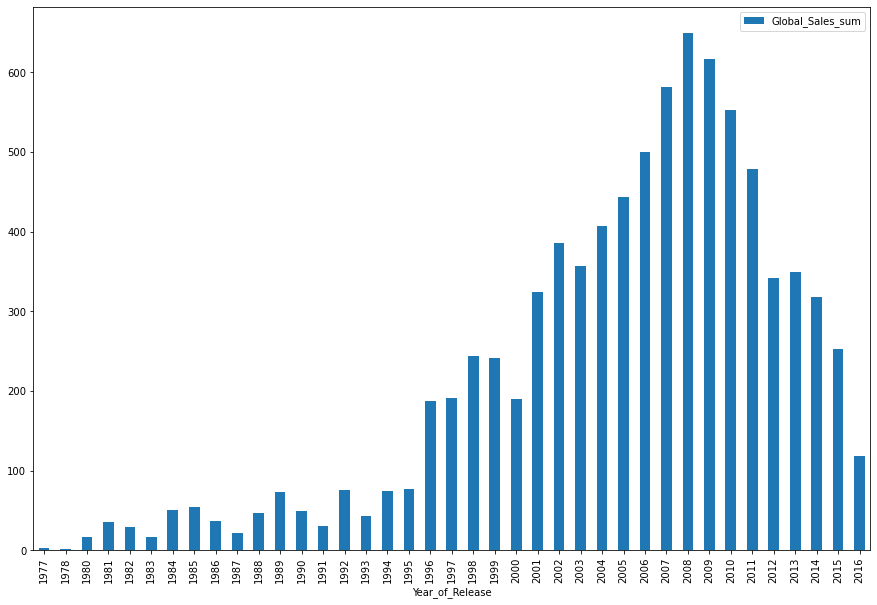

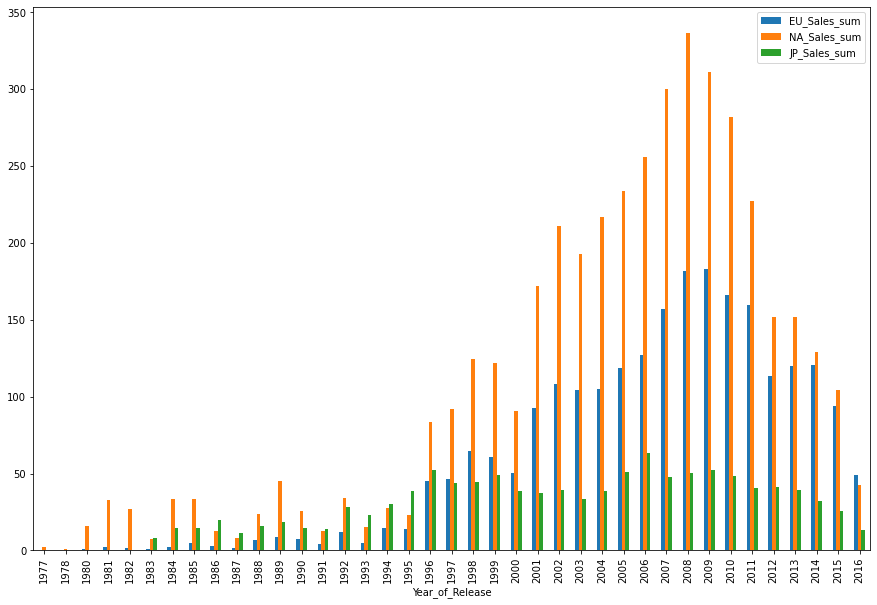

In [3]:
number_of_entries_by_years = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "sum", "max"])
number_of_entries_by_years.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years.columns.values]

number_of_entries_by_years.plot.bar(y="Global_Sales_sum", figsize=(15,10))
number_of_entries_by_years.plot.bar(y=["EU_Sales_sum", "NA_Sales_sum", "JP_Sales_sum"], figsize=(15,10))
# number_of_entries_by_years.plot.bar(y="Global_Sales_mean")
# number_of_entries_by_years.plot.bar(y="Global_Sales_max")

# number_of_entries_by_years.plot.bar(y="EU_Sales_sum")
# number_of_entries_by_years.plot.bar(y="EU_Sales_mean")
# number_of_entries_by_years.plot.bar(y="EU_Sales_max")

# number_of_entries_by_years.plot.bar(y="NA_Sales_sum")
# number_of_entries_by_years.plot.bar(y="NA_Sales_mean")
# number_of_entries_by_years.plot.bar(y="NA_Sales_max")

# number_of_entries_by_years.plot.bar(y="JP_Sales_sum")
# number_of_entries_by_years.plot.bar(y="JP_Sales_mean")
# number_of_entries_by_years.plot.bar(y="JP_Sales_max")

Stats grouped by genre

<AxesSubplot:xlabel='Genre'>

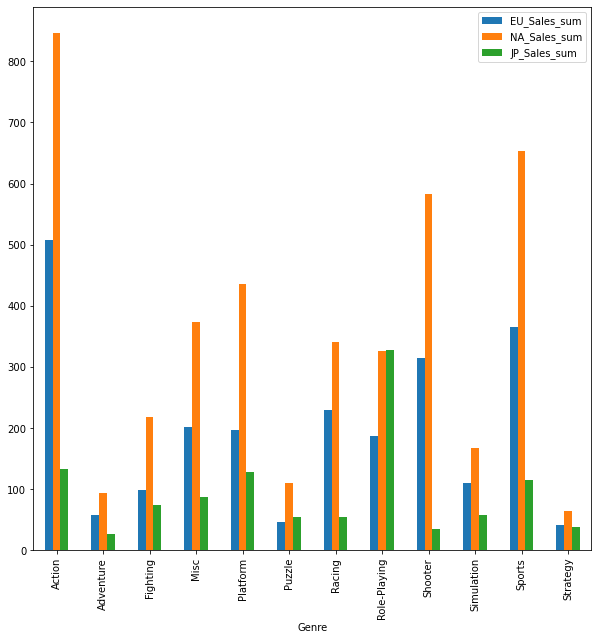

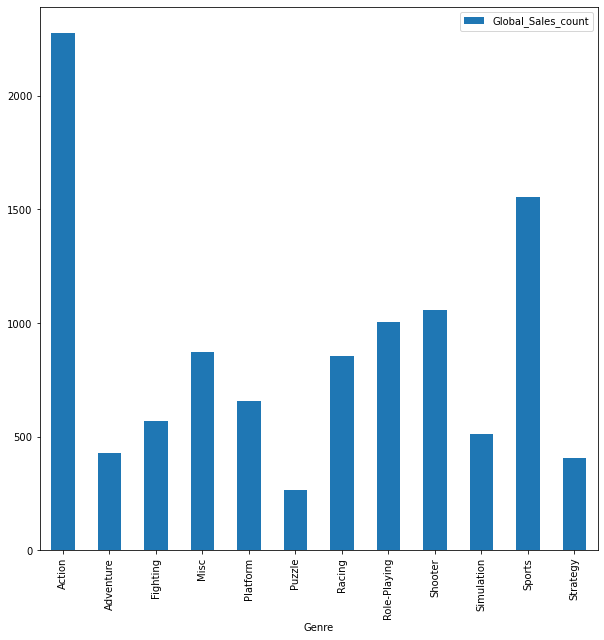

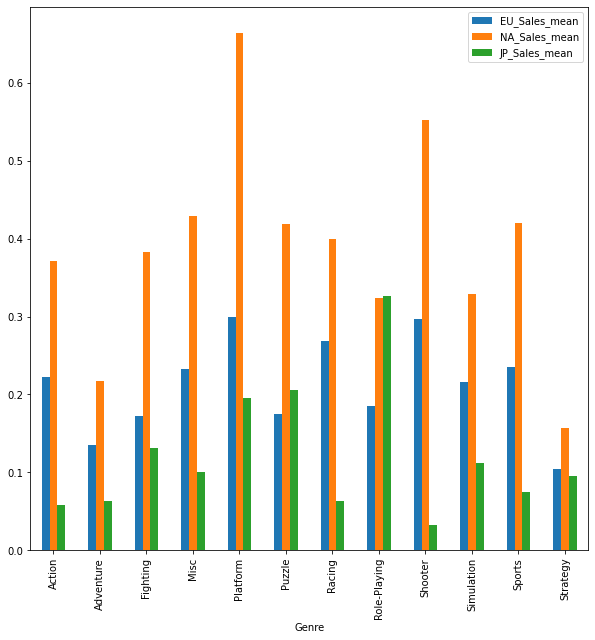

In [4]:
stats_by_genre = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales", "Genre"])\
    .groupby("Genre").agg(["mean", "count", "sum"])
stats_by_genre.columns = ['_'.join(col).strip()
                          for col in stats_by_genre.columns.values]

stats_by_genre.plot.bar(y=["EU_Sales_sum", "NA_Sales_sum", "JP_Sales_sum"], figsize=(10,10))
stats_by_genre.plot.bar(y="Global_Sales_count", figsize=(10,10))
stats_by_genre.plot.bar(y=["EU_Sales_mean", "NA_Sales_mean", "JP_Sales_mean"], figsize=(10,10))

Stats grouped by paltform

<AxesSubplot:xlabel='Platform'>

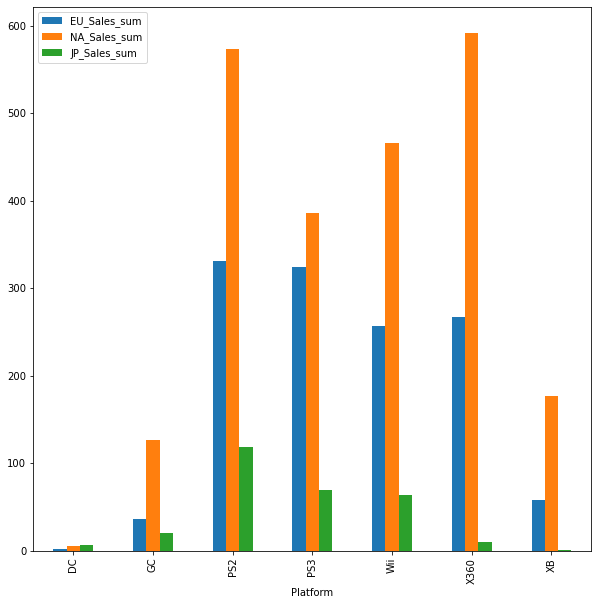

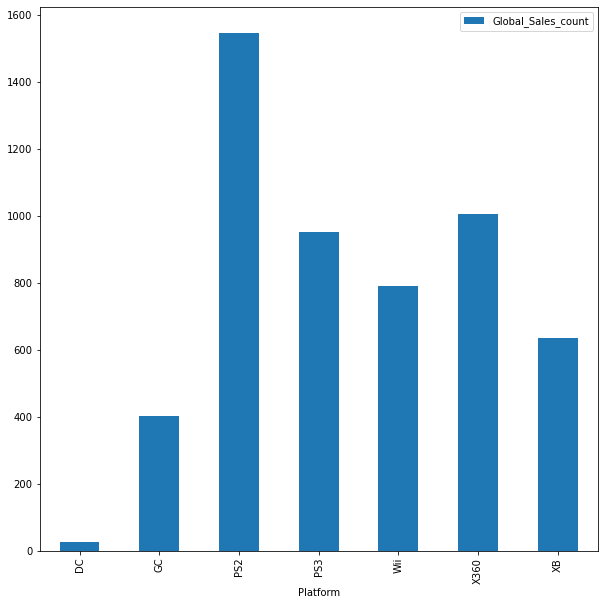

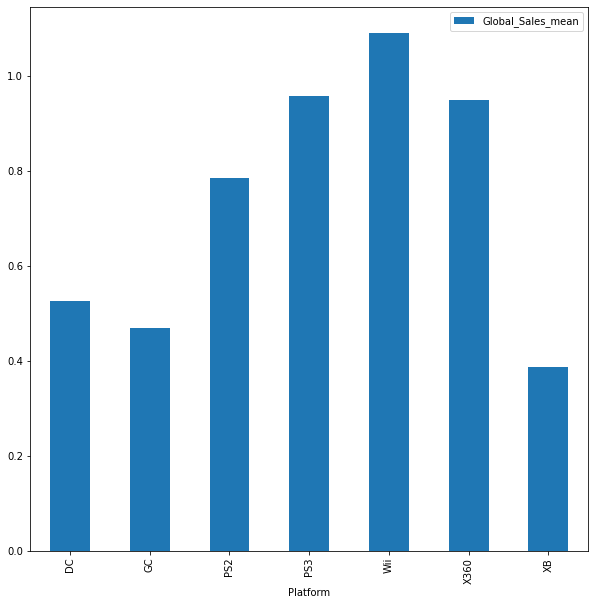

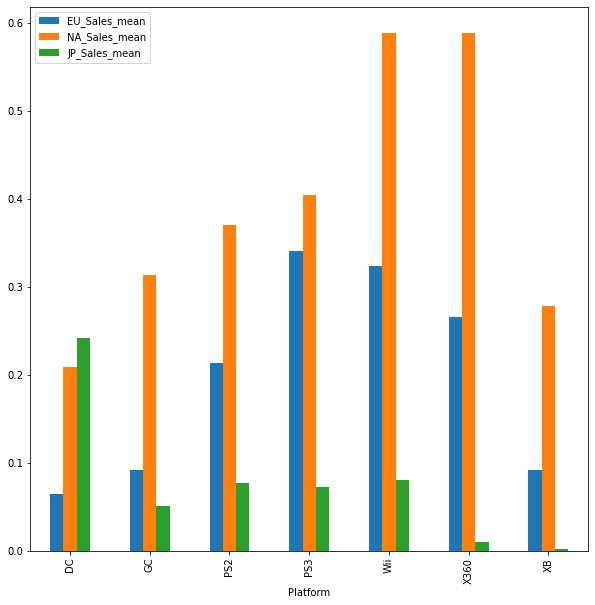

In [5]:
sixth_gen = ["PS2", "XB", "DC", "GC"]
seventh_gen = ["PS3", "Wii", "X360"]
chosen = seventh_gen.extend(sixth_gen)

stats_by_platform = data.loc[data["Platform"].isin(seventh_gen)]\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales", "Platform"])\
    .groupby("Platform").agg(["mean", "count", "sum"])
stats_by_platform.columns = ['_'.join(col).strip()
                          for col in stats_by_platform.columns.values]

stats_by_platform.plot.bar(y=["EU_Sales_sum", "NA_Sales_sum", "JP_Sales_sum"], figsize=(10,10))
stats_by_platform.plot.bar(y="Global_Sales_count", figsize=(10,10))
stats_by_platform.plot.bar(y=["Global_Sales_mean"], figsize=(10,10))
stats_by_platform.plot.bar(y=["EU_Sales_mean", "NA_Sales_mean", "JP_Sales_mean"], figsize=(10,10))

Critic Score to User Score

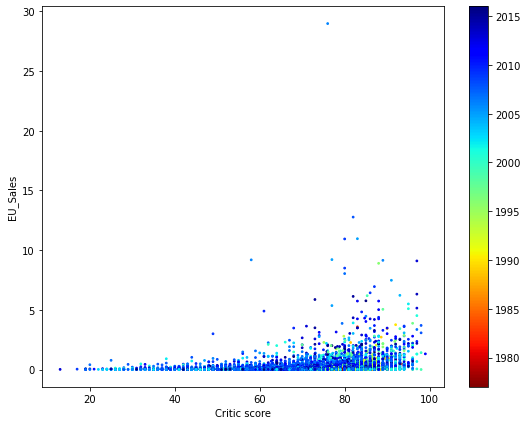

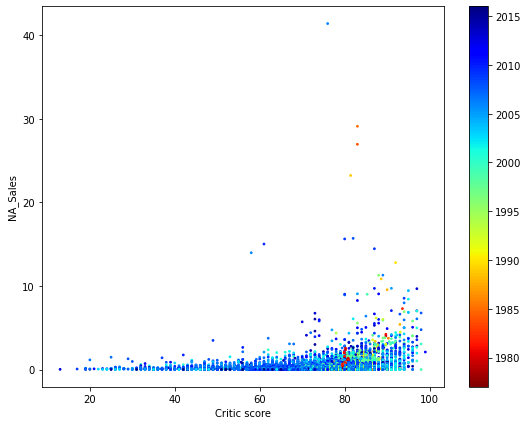

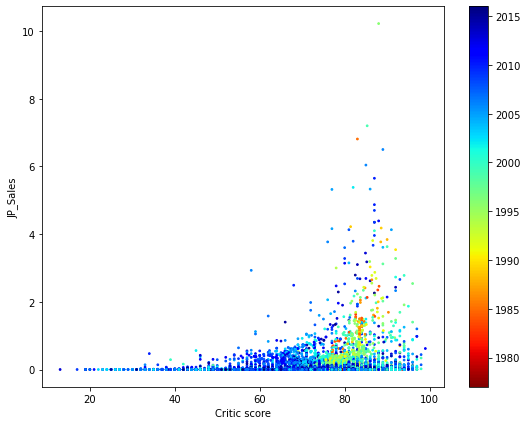

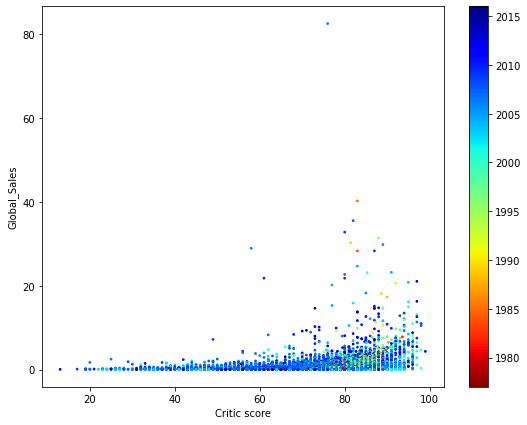

In [6]:
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.EU_Sales, data[category_column])\
    .with_labels('Critic score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.NA_Sales, data[category_column])\
    .with_labels('Critic score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.JP_Sales, data[category_column])\
    .with_labels('Critic score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.Global_Sales, data[category_column])\
    .with_labels('Critic score', 'Global_Sales')\
    .with_color_bar()\
    .plot()

Sales per region considering User Score

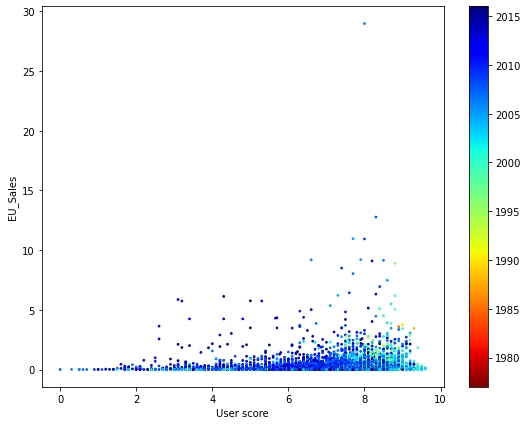

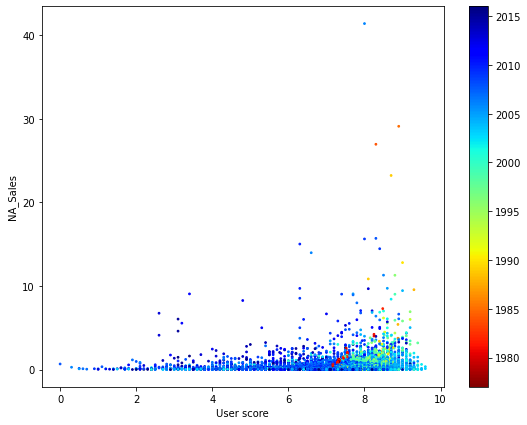

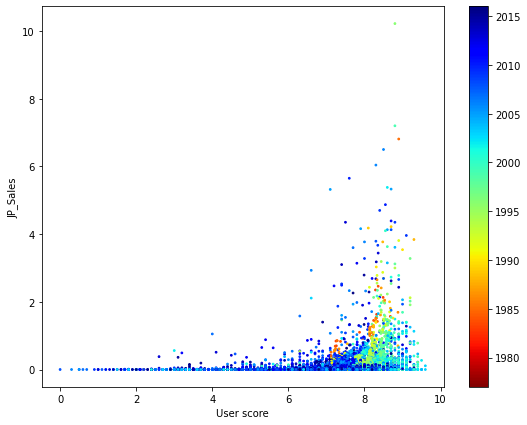

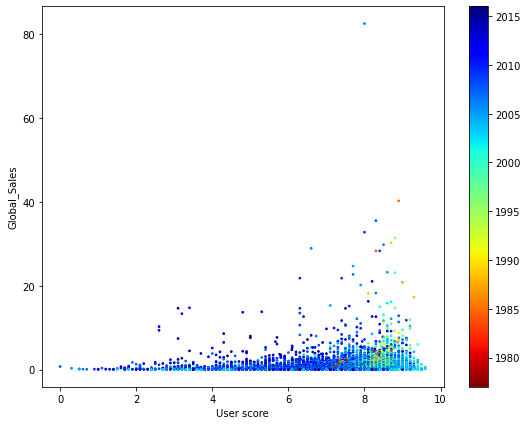

In [7]:
category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.EU_Sales, data[category_column])\
    .with_labels('User score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.NA_Sales, data[category_column])\
    .with_labels('User score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.JP_Sales, data[category_column])\
    .with_labels('User score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.Global_Sales, data[category_column])\
    .with_labels('User score', 'Global_Sales')\
    .with_color_bar()\
    .plot()


Correlation matrix between numerical values in the dataset

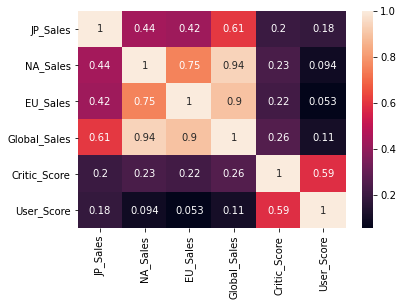

In [8]:
sns.heatmap(data[["JP_Sales", "NA_Sales", "EU_Sales", "Global_Sales", "Critic_Score", "User_Score"]].corr(), annot=True)
plt.show()

Heatmap x - Genre, y - Platform, heat - sales

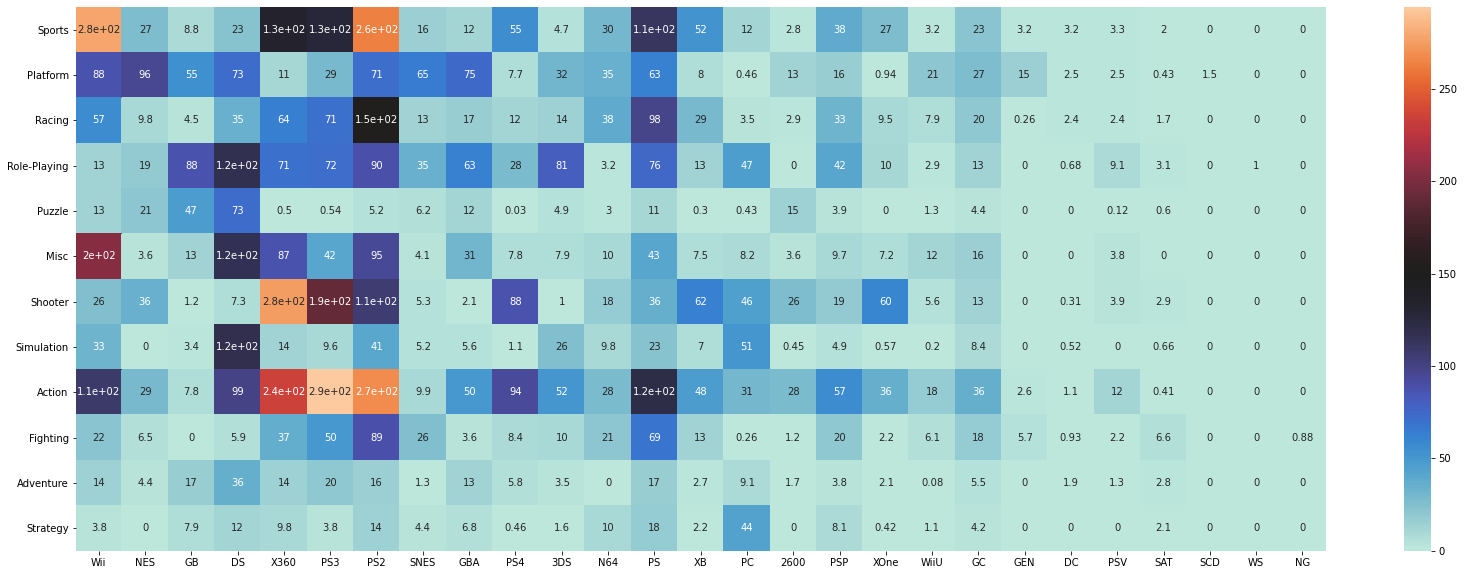

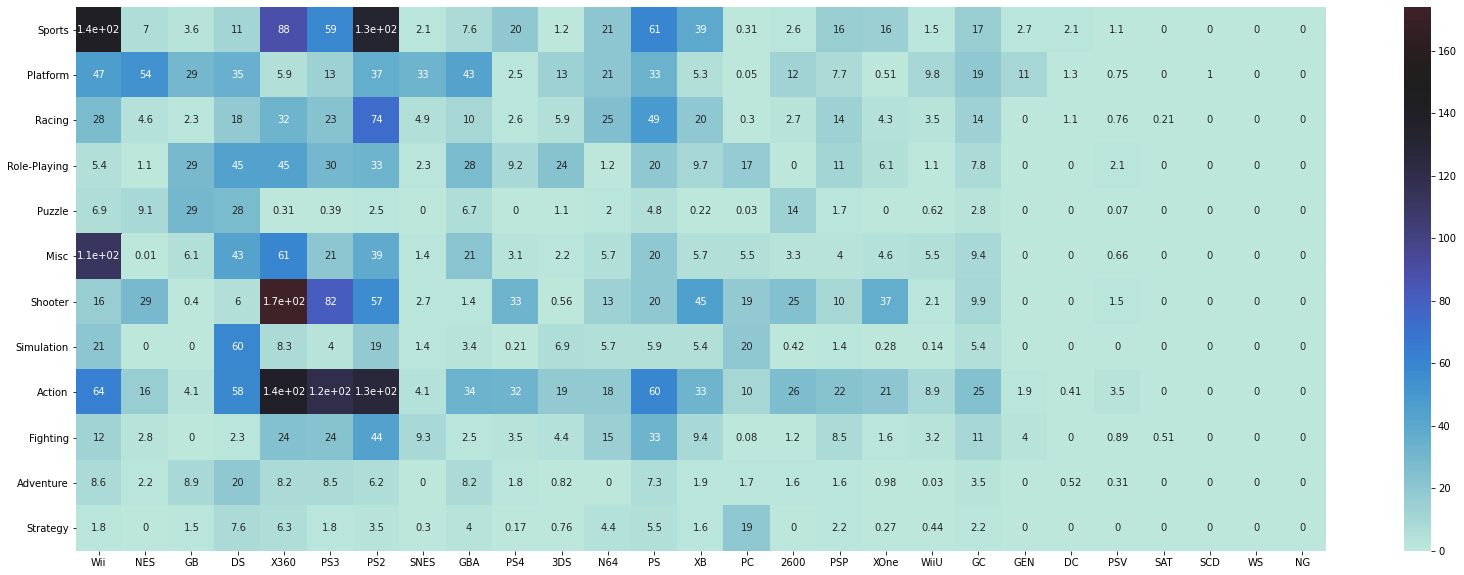

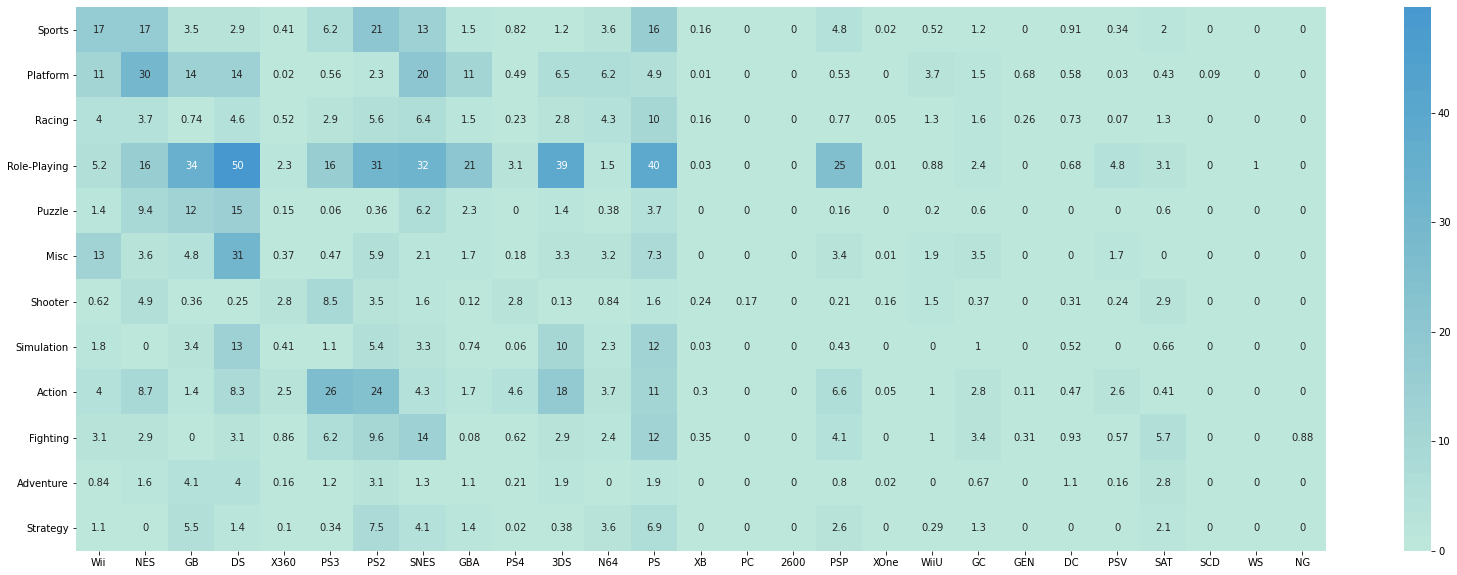

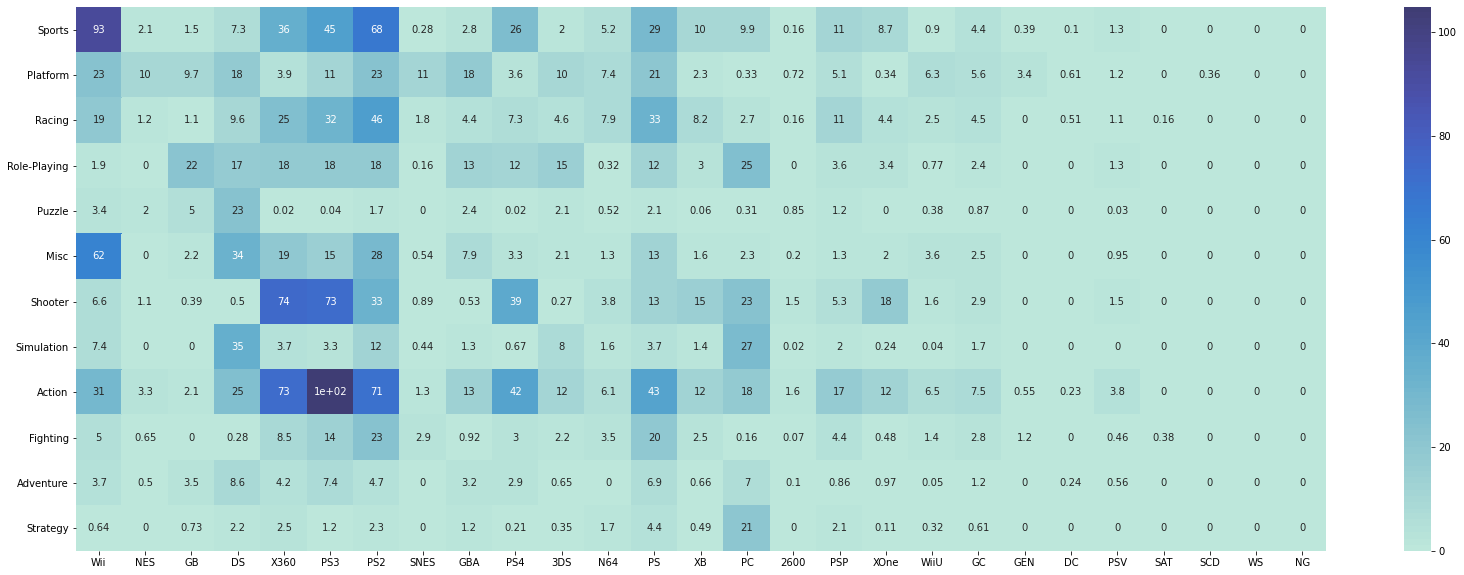

In [9]:
plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "Global_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "NA_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "JP_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "EU_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()